Text(0.02, 0.5, 'Discharge Capacity')

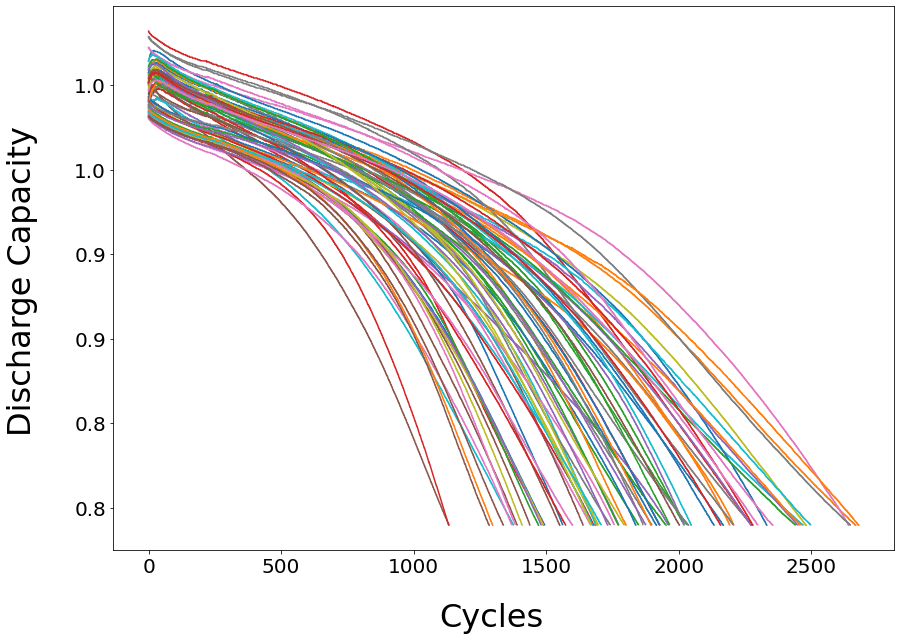

In [28]:
import numpy as np
from matplotlib.pylab import plt
from load_data import get_discharge_capacities_MIT
from matplotlib.ticker import FormatStrFormatter

fea_num =1
discharge_capacities_SNL = np.load(f"./Datasets/snl_data_{fea_num}.npy",allow_pickle=True)

name_start_train = 0
name_start_test = 70

d = []
for battery_temp in discharge_capacities_SNL:
    a = np.squeeze(battery_temp[0], axis = 1)     # Voltage/Current Features
    b = np.expand_dims(battery_temp[1], axis =1)  # Discharge Capccity
    c = np.concatenate((b,a), axis =1).T
    d.append(c)

discharge_capacities_SNL = d

from matplotlib.pylab import plt
import matplotlib as mpl

fig, ax = plt.subplots(1,1,figsize=(14,10))

for i in range(len(discharge_capacities_SNL)):
    plt.plot(discharge_capacities_SNL[i][0])

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


fig.supxlabel('Cycles',fontsize=32)
fig.supylabel('Discharge Capacity',fontsize=32)











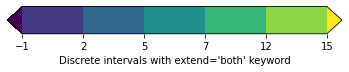

In [29]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.viridis
bounds = [-1, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")


In [30]:
# plt.figure(figsize=(14,10))
# for i in range(len(discharge_capacities)):
#     plt.plot(discharge_capacities[i][0])
# plt.xlabel("Cycles", fontsize = 30)
# plt.ylabel("Discharge Capacities", fontsize = 30)

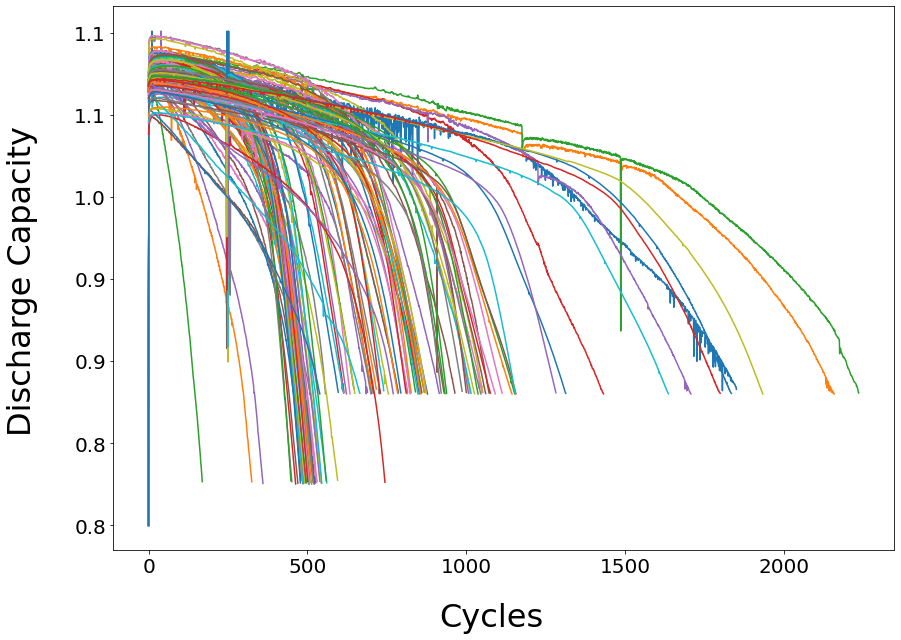

In [36]:
# Smoothing the input

discharge_capacities = get_discharge_capacities_MIT()
fig, ax = plt.subplots(1,1,figsize=(14,10))
maxes = []
mins = []
cycles = []
for  i in discharge_capacities:
    maxes.append(max(i[0]))
    mins.append(min(i[0]))
    cycles.append(len(i[0]))

# Only removing the maximum outliers
for i in range(len(discharge_capacities)):
    for j in range(len(discharge_capacities[i][0])):
        if(discharge_capacities[i][0][j]>np.mean(maxes)):           
            discharge_capacities[i][0][j]= np.mean(maxes)
        if(discharge_capacities[i][0][j]< 0.4):
            discharge_capacities[i][0][j] = 0.8

    ax.plot(discharge_capacities[i][0])
    # ax.set_ylabel("Discharge Capacities",fontdict=font)
    # ax.set_xlabel("Cycles",fontdict=font)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))
# ax.set_ylabel("Discharge Capacity",font=font)
# ax.set_xlabel("Cycles",font=font)


fig.supxlabel('Cycles',fontsize=32)
fig.supylabel('Discharge Capacity',fontsize=32)

plt.savefig("mit_dataset.pdf", dpi= 800)
plt.show()
        # if(discharge_capacities[i][j]<np.mean(mins)):
            
        #     discharge_capacities[i][j] =np.mean(mins)

In [40]:
np.mean(cycles)
np.std(cycles)

369.90309315016594